In [1]:
import os
from time import time
import xarray as xr

In [2]:
def _get_year_day(product, tif):
    fn = tif.split('/')[-1]
    fn = fn.replace(product,'')
    fn = fn.replace('.tif','')
    print(fn)
    return fn

In [3]:
def xr_build_cube_concat_ds(tif_list, product):

    start = time()
    my_da_list =[]
    year_day_list = []
    for tif in tif_list:
        #tiffile = 's3://dev-et-data/' + tif
        tiffile = tif
        print(tiffile)
        da = xr.open_rasterio(tiffile)
        #da = da.squeeze().drop(labels='band')
        #da.name=product
        my_da_list.append(da)
        tnow = time()
        elapsed = tnow - start
        print(tif, elapsed)
        year_day_list.append(_get_year_day(product, tif))

    da = xr.concat(my_da_list, dim='band')
    da = da.rename({'band':'year_day'})
    da = da.assign_coords(year_day=year_day_list)
    DS = da.to_dataset(name=product)
    return(DS)

In [4]:
def create_s3_list_of_days(main_prefix, year, input_name='srf_'):
    the_list = []
    for i in range(1,366):
        day = f'{i:03d}'
        file_object = main_prefix +os.sep+ str(year) +os.sep+ input_name + str(year) + str(day) + '.tif'
        print(file_object)
        the_list.append(file_object)
    return the_list

In [5]:
def xarray_creator(output_name):
    #working_bucket = 'dev-et-data'
    main_prefix = '/home/jovyan/data_wotje'
    years = range(1988,1989)
    #output_name = 'etasw_'
    #output_name = 'dd_'
    output_name = 'srf_'

    year=2019
    my_tifs = create_s3_list_of_days(main_prefix, year, output_name)
    ds = xr_build_cube_concat_ds(my_tifs, output_name)
        
    return(ds)

In [6]:
out='srf_'
DS=xarray_creator(out)

/home/jovyan/data_wotje/2019/srf_2019001.tif
/home/jovyan/data_wotje/2019/srf_2019002.tif
/home/jovyan/data_wotje/2019/srf_2019003.tif
/home/jovyan/data_wotje/2019/srf_2019004.tif
/home/jovyan/data_wotje/2019/srf_2019005.tif
/home/jovyan/data_wotje/2019/srf_2019006.tif
/home/jovyan/data_wotje/2019/srf_2019007.tif
/home/jovyan/data_wotje/2019/srf_2019008.tif
/home/jovyan/data_wotje/2019/srf_2019009.tif
/home/jovyan/data_wotje/2019/srf_2019010.tif
/home/jovyan/data_wotje/2019/srf_2019011.tif
/home/jovyan/data_wotje/2019/srf_2019012.tif
/home/jovyan/data_wotje/2019/srf_2019013.tif
/home/jovyan/data_wotje/2019/srf_2019014.tif
/home/jovyan/data_wotje/2019/srf_2019015.tif
/home/jovyan/data_wotje/2019/srf_2019016.tif
/home/jovyan/data_wotje/2019/srf_2019017.tif
/home/jovyan/data_wotje/2019/srf_2019018.tif
/home/jovyan/data_wotje/2019/srf_2019019.tif
/home/jovyan/data_wotje/2019/srf_2019020.tif
/home/jovyan/data_wotje/2019/srf_2019021.tif
/home/jovyan/data_wotje/2019/srf_2019022.tif
/home/jovy

/home/jovyan/data_wotje/2019/srf_2019001.tif 0.6763689517974854
2019001
/home/jovyan/data_wotje/2019/srf_2019002.tif
/home/jovyan/data_wotje/2019/srf_2019002.tif 0.7009165287017822
2019002
/home/jovyan/data_wotje/2019/srf_2019003.tif
/home/jovyan/data_wotje/2019/srf_2019003.tif 0.7223238945007324
2019003
/home/jovyan/data_wotje/2019/srf_2019004.tif
/home/jovyan/data_wotje/2019/srf_2019004.tif 0.747605562210083
2019004
/home/jovyan/data_wotje/2019/srf_2019005.tif
/home/jovyan/data_wotje/2019/srf_2019005.tif 0.7678985595703125
2019005
/home/jovyan/data_wotje/2019/srf_2019006.tif
/home/jovyan/data_wotje/2019/srf_2019006.tif 0.7929127216339111
2019006
/home/jovyan/data_wotje/2019/srf_2019007.tif
/home/jovyan/data_wotje/2019/srf_2019007.tif 0.8131513595581055
2019007
/home/jovyan/data_wotje/2019/srf_2019008.tif
/home/jovyan/data_wotje/2019/srf_2019008.tif 0.8399713039398193
2019008
/home/jovyan/data_wotje/2019/srf_2019009.tif
/home/jovyan/data_wotje/2019/srf_2019009.tif 0.8574457168579102
2

/home/jovyan/data_wotje/2019/srf_2019072.tif 2.144076347351074
2019072
/home/jovyan/data_wotje/2019/srf_2019073.tif
/home/jovyan/data_wotje/2019/srf_2019073.tif 2.1653854846954346
2019073
/home/jovyan/data_wotje/2019/srf_2019074.tif
/home/jovyan/data_wotje/2019/srf_2019074.tif 2.183804750442505
2019074
/home/jovyan/data_wotje/2019/srf_2019075.tif
/home/jovyan/data_wotje/2019/srf_2019075.tif 2.202577590942383
2019075
/home/jovyan/data_wotje/2019/srf_2019076.tif
/home/jovyan/data_wotje/2019/srf_2019076.tif 2.2225091457366943
2019076
/home/jovyan/data_wotje/2019/srf_2019077.tif
/home/jovyan/data_wotje/2019/srf_2019077.tif 2.242875337600708
2019077
/home/jovyan/data_wotje/2019/srf_2019078.tif
/home/jovyan/data_wotje/2019/srf_2019078.tif 2.263613700866699
2019078
/home/jovyan/data_wotje/2019/srf_2019079.tif
/home/jovyan/data_wotje/2019/srf_2019079.tif 2.2839672565460205
2019079
/home/jovyan/data_wotje/2019/srf_2019080.tif
/home/jovyan/data_wotje/2019/srf_2019080.tif 2.3028738498687744
20190

/home/jovyan/data_wotje/2019/srf_2019144.tif 3.59714937210083
2019144
/home/jovyan/data_wotje/2019/srf_2019145.tif
/home/jovyan/data_wotje/2019/srf_2019145.tif 3.6154367923736572
2019145
/home/jovyan/data_wotje/2019/srf_2019146.tif
/home/jovyan/data_wotje/2019/srf_2019146.tif 3.635939359664917
2019146
/home/jovyan/data_wotje/2019/srf_2019147.tif
/home/jovyan/data_wotje/2019/srf_2019147.tif 3.6553540229797363
2019147
/home/jovyan/data_wotje/2019/srf_2019148.tif
/home/jovyan/data_wotje/2019/srf_2019148.tif 3.6748108863830566
2019148
/home/jovyan/data_wotje/2019/srf_2019149.tif
/home/jovyan/data_wotje/2019/srf_2019149.tif 3.6939735412597656
2019149
/home/jovyan/data_wotje/2019/srf_2019150.tif
/home/jovyan/data_wotje/2019/srf_2019150.tif 3.7133898735046387
2019150
/home/jovyan/data_wotje/2019/srf_2019151.tif
/home/jovyan/data_wotje/2019/srf_2019151.tif 3.7374508380889893
2019151
/home/jovyan/data_wotje/2019/srf_2019152.tif
/home/jovyan/data_wotje/2019/srf_2019152.tif 3.7577340602874756
201

/home/jovyan/data_wotje/2019/srf_2019217.tif 5.090070962905884
2019217
/home/jovyan/data_wotje/2019/srf_2019218.tif
/home/jovyan/data_wotje/2019/srf_2019218.tif 5.111506223678589
2019218
/home/jovyan/data_wotje/2019/srf_2019219.tif
/home/jovyan/data_wotje/2019/srf_2019219.tif 5.1331703662872314
2019219
/home/jovyan/data_wotje/2019/srf_2019220.tif
/home/jovyan/data_wotje/2019/srf_2019220.tif 5.152696847915649
2019220
/home/jovyan/data_wotje/2019/srf_2019221.tif
/home/jovyan/data_wotje/2019/srf_2019221.tif 5.171645879745483
2019221
/home/jovyan/data_wotje/2019/srf_2019222.tif
/home/jovyan/data_wotje/2019/srf_2019222.tif 5.1911890506744385
2019222
/home/jovyan/data_wotje/2019/srf_2019223.tif
/home/jovyan/data_wotje/2019/srf_2019223.tif 5.210811376571655
2019223
/home/jovyan/data_wotje/2019/srf_2019224.tif
/home/jovyan/data_wotje/2019/srf_2019224.tif 5.230608701705933
2019224
/home/jovyan/data_wotje/2019/srf_2019225.tif
/home/jovyan/data_wotje/2019/srf_2019225.tif 5.249004602432251
2019225

/home/jovyan/data_wotje/2019/srf_2019290.tif 6.573932886123657
2019290
/home/jovyan/data_wotje/2019/srf_2019291.tif
/home/jovyan/data_wotje/2019/srf_2019291.tif 6.594200849533081
2019291
/home/jovyan/data_wotje/2019/srf_2019292.tif
/home/jovyan/data_wotje/2019/srf_2019292.tif 6.6138246059417725
2019292
/home/jovyan/data_wotje/2019/srf_2019293.tif
/home/jovyan/data_wotje/2019/srf_2019293.tif 6.636636018753052
2019293
/home/jovyan/data_wotje/2019/srf_2019294.tif
/home/jovyan/data_wotje/2019/srf_2019294.tif 6.655718088150024
2019294
/home/jovyan/data_wotje/2019/srf_2019295.tif
/home/jovyan/data_wotje/2019/srf_2019295.tif 6.6758713722229
2019295
/home/jovyan/data_wotje/2019/srf_2019296.tif
/home/jovyan/data_wotje/2019/srf_2019296.tif 6.693617582321167
2019296
/home/jovyan/data_wotje/2019/srf_2019297.tif
/home/jovyan/data_wotje/2019/srf_2019297.tif 6.714254856109619
2019297
/home/jovyan/data_wotje/2019/srf_2019298.tif
/home/jovyan/data_wotje/2019/srf_2019298.tif 6.733166456222534
2019298
/h

In [7]:
#!aws s3 ls dev-et-data/out/WOTJE/Run06_14_2021/run_wotje_06142021_o/2019/

In [8]:
DS

<xarray.Dataset>
Dimensions:   (x: 1992, y: 1166, year_day: 365)
Coordinates:
  * year_day  (year_day) <U7 '2019001' '2019002' ... '2019364' '2019365'
  * y         (y) float64 9.609 9.609 9.609 9.608 ... 9.292 9.291 9.291 9.291
  * x         (x) float64 169.8 169.8 169.8 169.8 ... 170.3 170.3 170.3 170.3
Data variables:
    srf_      (year_day, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [9]:
!ls ~/data_wotje/

2017  2018  2019  2020	Annual	aaalog


In [10]:
!pwd

/home/jovyan/opt/s3-sadness/00-notebooks


In [11]:
%%time
dst=DS.sel(x=169.9,y=9.3, method='nearest')

CPU times: user 2.8 ms, sys: 748 µs, total: 3.55 ms
Wall time: 13.3 ms


In [12]:
dst

<xarray.Dataset>
Dimensions:   (year_day: 365)
Coordinates:
  * year_day  (year_day) <U7 '2019001' '2019002' ... '2019364' '2019365'
    y         float64 9.3
    x         float64 169.9
Data variables:
    srf_      (year_day) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

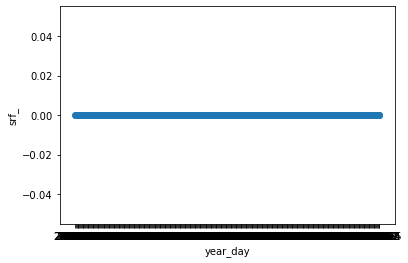

In [13]:
dst.plot.scatter(x='year_day', y='srf_')